# Intro to Filters

Filters are an entire life study in themselves and the math gets deep quickly, but here is a quick minimal-math overview.  An input signal having some wide-ish frequency content is applied to the filter input -- the filter passes certain regions of frequencies to the output and suppresses other regions of frequencies.  Four basic amplidude-vs-frequency response shapes are:

![](images/filter-responses.png)

In the amplitude (aka magnitude) response, the passband level is defined as 0 dB (decibel) and the "cutoff" frequency(ies) fc are defined as 3dB down from the passband.  A notch filter usually has a narrow rejection region (eg: to remove 60 Hz powerline noise), or can have a wider region of suppression in which case it is called a band-reject filter.  Filter "order" defines how quickly the filter rolls off the signal amplitude in the transition region.

![](images/filter-order.png)

There are different topologies of filters, each having different magnitude/phase characteristics.  A Bessel filter has a flat passband and a slow rolloff response, but is useful for applications that require minimal phase shift.  A Butterworth (aka maximally flat) filter has a flat passband response but less linear phase response;  it is a good general-purpose filter.  The Chebyshev (aka Tchebychev) filter has a ripple response in the passband (Type 1) or in the stopband (Type 2).  The steeper the rolloff, the higher the amplitude of the ripple.  It has a non-linear phase response that will distort pulses, but has many applications where a steep rolloff is needed and the ripple and phase response are acceptable.  The Elliptic filter has ripple in both the passband and the stopband and can be used where high selectivity is desired (eg: a bandpass tone detector).  There is another category: an "Allpass" filter will adjust the phase of a signal without altering its amplitude (eg: time alignment between multiple speakers).

![](images/filter-topologies.png)

When a filter has linear phase response, all input frequency components are shifted in time by the same amount, preserving the waveform's shape.  A non-linear phase response introduces different delays for different frequencies, distorting the shape of pulses.  In some applications such as audio, a non-linear phase response is not particularly notictable.

Magnitude Response                 |  Phase Response
:---------------------------------:|:------------------------------:
![](images/example-magnitude.png)  |  ![](images/example-phase.png)

# Analog Filters

Analog filters (for continuous time domain signals) are built with electronic components.  A first-order filter in an analog circuit is obtained with just a resistor and capacitor (RC).  It is easy to figure out which is which by just remembering that at low frequencies a capacitor is open, and at high freqs it is a short :)

RC Lowpass (first order)     |  RC Highpass (first order)
:---------------------------:|:------------------------------:
![](images/RC-lowpass.png)   |   ![](images/RC-highpass.png)

An analog filter section is typically first or second order.  Higher order filters are built with cascaded (connected in series) first-order and second-order filter stages.  A "passive" filter requires no power, such as RC filters, or LC filters (inductor and capacitor) designs which are used in radio frequency (RF) circuits, such as matching an antenna to a power amplifier.   An "active" filter is designed using amplifier chips and RC components.  A popular second-order topology is called Sallen & Key (named after people, like many things in filter design).  

Sallen & Key Second-Order    |  Equations
:---------------------------:|:------------------------------:
![](images/sallen-key.png)   |   ![](images/sallen-key-equations.png)

This shows a new parameter called 'Q' which introduces a magnitude peak around cuttoff.  The circuit is designed to provide a peaking or non-peaking response.  A Q of 0.707 (1 / √2) is the point of "critical damping" in a second-order system, meaning the system will return to equilibrium as quickly as possible without overshooting.

![](images/second-order-with-Q.png)

I have a particular fondness for an unusual topology called FDNR (frequency-dependent negative resistor), which takes me back to the 80s.  This has an unusal workflow:  design a passive LC ladder filter that meets the specs, laplace transform the transfer function equation to the s-domain, divide that equation by s, and then the original capacitors become resistors, and the inductors become FDNR elements made from one or two opamps.  Kinda crazy circuit.

![](images/fdnr.png)

# Poles and Zeros

To design an analog filter, the desired response is defined by a transfer function equation (that defines the relation of the output to the input) in the time domain.  A laplace transform converts it to a representation in the s-plane -- this is the complex frequency domain where the horizontal axis denotes the real part (σ) and the vertical axis denotes the imaginary part (jω) of the complex variable 's'.  In the s-domain, the tranfer function is an equation that has a numerator and denominator:  H(s) = Y(s) / X(s).  So, when the numerator Y(s) goes to zero (at some specific frequency), the output goes to zero (exemplified by the stopband dips in the eliptical filter, above), and when the denominator goes to zero (at some specific frequency), well, recall that 1/0 = infinity -- this is a pole.  

When the s-domain is plotted in 3d, you can see the poles (and zeros if they are used).  When you slice down through σ = 0, you see the magnitude response (positive jω) shown as red lines below -- which is pretty cool!  You can see how the Q peaking occurs as the response gets pulled up by a pole.

Second-Order Q = 1 / √2      |  Second-Order Q = 2
:---------------------------:|:------------------------------:
![](images/second-order-Q-0.707-3d.png)   |   ![](images/second-order-Q-2-3d.png)

Here is a fourth-order Butterworth lowpass, and a second-order Allpass (note the flat response):

Fourth-Order Butterworth Lowpass    |  Second-Order Allpass
:---------------------------:|:------------------------------:
![](images/fourth-order-butterworth-lowpass-3d.png)   |   ![](images/second-order-allpass-3d.png)

You can see the passband ripple in the Chebychev filter -- in the Elliptical design note how the zeros provide the stopband dips:

Fourth-order Chebychev Lowpass   |  Fourth-order Elliptic Lowpass
:---------------------------:|:------------------------------:
![](images/fourth-order-chebychev-lowpass-3d.png)   |   ![](images/fourth-order-elliptic-lowpass-3d.png)

I find that these 3d graphs provide a lot of insight into how the pole/zero positions affect the response.  Also note that a second-order filter has two poles, a fourth-order has four poles...

# Digital Filters

While in the "continuous" time-domain, analog filters are used -- in the "sampled-data" time-domain, digital filters are used.  As in analog filter design, the same responses can be achieved (Chebychev...), and the digital realm uses an analogous z-plane instead of the s-plane.  The z-domain tranfer function is also an equation that has a numerator and denominator:  H(z) = B(z) / A(z), where B(z) is the numerator polynomial and A(z) is the denominator polynomial.  Each of these polynomials are defined by an array of coefficients.  Digital filters are a gigantic topic and beyond the scope of this intro, but let's look at the Butterworth digital filter as implemented in python using scipy.  

For legacy filter designs, scipy filter modules return "b, a" which are arrays of the numerator and denominator polynomials defining the filter response.  This is described as transfer function (TF) form by scipy.

Note 1:  Digital filters can be implemented with high orders (eg: 10 or more) which can  sometimes lead to numerical instabilities during processing.  As the filter order goes up, the needed coefficient precision increases quickly, and the sensitivity to noise may degrade.

Note 2:  Instead if implementing a single high order filter, a good option is to cascade multiple lower-order sections, as is also done with analog filters.  This is done in python scipy filter modules with SOS (second-order-sections) output, which cascades simple order-2 filter sections, that are numerically stable.

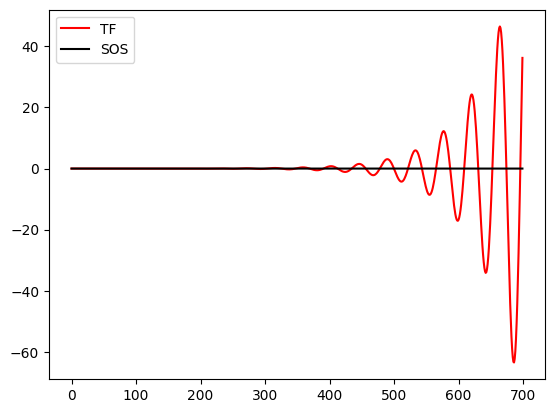

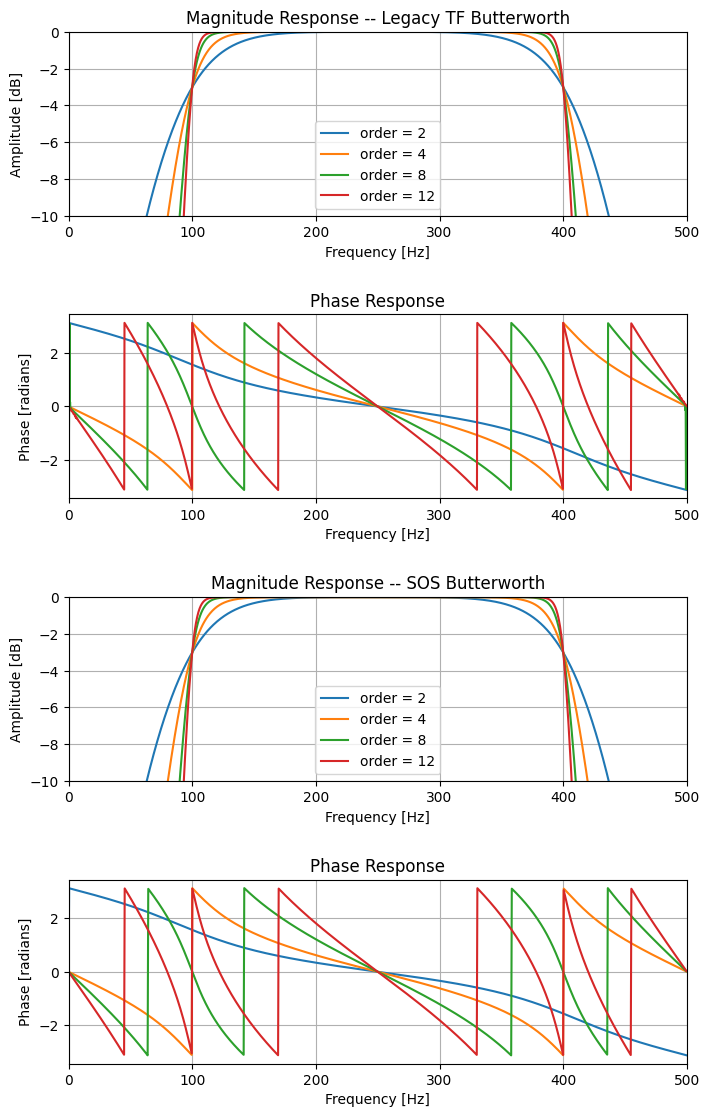

In [16]:
"""
    bandpass-test-2
"""
from scipy.signal import butter, lfilter, filtfilt, freqz, sosfilt, sosfiltfilt, sosfreqz, ellip, unit_impulse
import numpy as np
import matplotlib.pyplot as plt


def bandpass_filter(data, fc_low_Hz, fc_high_Hz, dt_ms, order=6, filter_type='sosfilt'):
    """
    Bandpass filters the data between fc_low_Hz and fc_high_Hz frequencies.

    Use sosfilt or sosfiltfilt for most filtering tasks, as second-order sections have fewer numerical problems.

    The sosfiltfilt or filtfilt zero-phase filters apply a linear digital filter twice, once forward and once 
    backwards, reulting in zero phase and a filter order twice that of the original.

    Parameters:
        - data: array-like, the signal to be filtered
        - fc_low_Hz: float, lower cutoff frequency in Hz
        - fc_high_Hz: float, higher cutoff frequency in Hz
        - dt_ms: float, time step in milliseconds
        - order: int, order of the filter
        - filter_type: str, 'sosfilt'       # preferred sos: causal
                            'sosfiltfilt'   # preferred sos: zero-phase
                            'lfilter'       # discouraged TF: causal
                            'filtfilt'      # discouraged TF: zero-phase
    Returns:
        - y: array-like, the bandpass-filtered signal
    """
    # convert dt in ms to sampling frequency in Hz:
    fs_Hz = 1000.0 / dt_ms
    # Wn units [low, high] are normalized from 0 to 1, where 1 is the Nyquist frequency:
    nyquist = 0.5 * fs_Hz
    low = fc_low_Hz / nyquist
    high = fc_high_Hz / nyquist

    # SOS format, causal:
    if filter_type == 'sosfilt':
        sos = butter(order, [low, high], btype='band', output='sos')    # must NOT have fs passed
        y = sosfilt(sos, data)

    # SOS format, zero-phase:
    elif filter_type == 'sosfiltfilt':
        sos = butter(order, [low, high], btype='band', output='sos')    # must NOT have fs passed
        y = sosfiltfilt(sos, data)

    # TF coefficients, causal:
    elif filter_type == 'lfilter':  
        b, a = butter(order, [fc_low_Hz, fc_high_Hz], fs=fs_Hz, btype='band', output='ba') 
        y = lfilter(b, a, data)

    # TF coefficients, zero-phase:
    elif filter_type == 'filtfilt':
        b, a = butter(order, [fc_low_Hz, fc_high_Hz], fs=fs_Hz, btype='band', output='ba') 
        y = filtfilt(b, a, data)
    else:
        raise ValueError("filter_type must be 'sosfilt', 'sosfiltfilt', 'lfilter', or 'filtfilt'")
    return y




if __name__ == "__main__":

    # ==================== from scipy docs:  Plot a 13th-order filter’s impulse response using both lfilter and sosfilt, 
    #       showing the instability that results from trying to do a 13th-order filter in a single stage 
    #       (the numerical error pushes some poles outside of the unit circle):
    b, a = ellip(13, 0.009, 80, 0.05, output='ba')
    sos = ellip(13, 0.009, 80, 0.05, output='sos')
    x = unit_impulse(700)
    y_tf = lfilter(b, a, x)
    y_sos = sosfilt(sos, x)
    plt.plot(y_tf, 'r', label='TF')
    plt.plot(y_sos, 'k', label='SOS')
    plt.legend(loc='best')
    plt.show()


    # ==================== Sample rate and desired cutoff frequencies (in Hz) for below filter plots:
    fs_Hz = 1000.0
    fc_low_Hz = 100.0
    fc_high_Hz = 400.0

    fig, axs = plt.subplots(4, 1, figsize=(8, 12))
    fig.tight_layout(pad=5.0)


    # ===== plot the frequency/phase response for a few different orders -- LEGACY butterworth (TF form with b,a output):
    #
    for order in [2, 4, 8, 12]:
        b, a = butter(order, [fc_low_Hz, fc_high_Hz], fs=fs_Hz, btype='band', output='ba')
        w, h = freqz(b, a, fs=fs_Hz, worN=2000)
        # the where= traps divide-by-zero runtime warnings
        axs[0].plot(w, 20 * np.log10(np.abs(h), where=np.abs(h)>0), label="order = %d" % order)
        axs[1].plot(w, np.angle(h))
    axs[0].set_xlim(0, 500)
    axs[0].set_ylim(-10, 0)
    axs[0].set_title('Magnitude Response -- Legacy TF Butterworth')
    axs[0].set_xlabel('Frequency [Hz]')
    axs[0].set_ylabel('Amplitude [dB]')
    axs[0].grid(True)
    axs[1].set_xlim(0, 500)
    axs[1].set_title('Phase Response')
    axs[1].set_xlabel('Frequency [Hz]')
    axs[1].set_ylabel('Phase [radians]')
    axs[1].grid(True)
    axs[0].legend(loc='best')



    # ===== plot the frequency/phase response for a few different orders -- SOS butterworth.
    #
    for order in [2, 4, 8, 12]:
        # Wn units [low, high] are normalized from 0 to 1, where 1 is the Nyquist frequency:
        nyq = 0.5 * fs_Hz
        low = fc_low_Hz / nyq      
        high = fc_high_Hz / nyq    # ditto
        sos = butter(order, [low, high], btype='band', output='sos')    # must NOT have fs passed
        w, h = sosfreqz(sos, worN=1024, fs=fs_Hz)                       # must have fs passed
        # the where= traps divide-by-zero runtime warnings
        axs[2].plot(w, 20 * np.log10(np.abs(h), where=np.abs(h)>0), label="order = %d" % order)
        axs[3].plot(w, np.angle(h))
    axs[2].set_xlim(0, 500) 
    axs[2].set_ylim(-10, 0)
    axs[2].set_title('Magnitude Response -- SOS Butterworth')
    axs[2].set_xlabel('Frequency [Hz]')
    axs[2].set_ylabel('Amplitude [dB]')
    axs[2].grid(True)
    axs[3].set_xlim(0, 500)
    axs[3].set_title('Phase Response')
    axs[3].set_xlabel('Frequency [Hz]')
    axs[3].set_ylabel('Phase [radians]')
    axs[3].grid(True)
    axs[2].legend(loc='best')

